In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 30)

data = pd.read_csv("../datasets/TMNIST_Data.csv")

In [2]:
scaler = Normalizer()
scaled = scaler.fit_transform(data[data.columns[1:]])
features = scaled[:,1:]
shape = [29900,10]
label = np.zeros(shape)

In [3]:
for i in range(0,29900):
    label[i][data["labels"][i]-1] = data["labels"][i]

xtrain, xtest, ytrain, ytest = train_test_split(features, label, train_size = 0.8, shuffle=False)

In [4]:
MLP = MLPRegressor(activation='relu', random_state=0)
param_grid = {
    'hidden_layer_sizes': [(32,32),(32,32,32)], 
    'solver': ['adam'],
    'batch_size': [100, 200],
    'max_iter': [100, 200]
}

mod = GridSearchCV(estimator=MLP,
                   param_grid=param_grid,
                   cv=3,
                   n_jobs=-1, 
                   verbose=3
                   )


In [5]:
mod.fit(xtrain,ytrain)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=MLPRegressor(random_state=0), n_jobs=-1,
             param_grid={'batch_size': [100, 200],
                         'hidden_layer_sizes': [(32, 32), (32, 32, 32)],
                         'max_iter': [100, 200], 'solver': ['adam']},
             verbose=3)

In [6]:
mod.predict(xtest)
mod.score(xtest,ytest)

0.8658009089855117

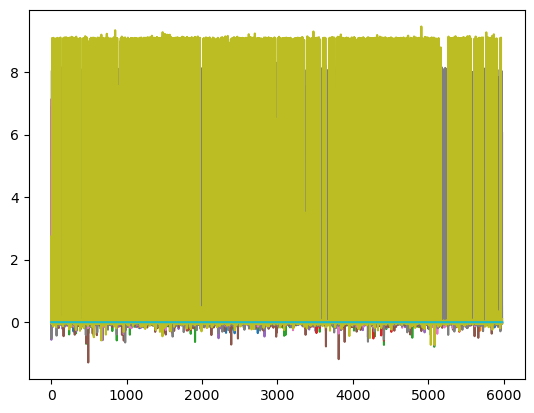

In [7]:
plt.plot(mod.predict(xtest))